# Data Analysis File

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv("Historical Product Demand.csv")
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [26]:
df['Date'] = pd.to_datetime(df['Date'])


In [27]:
# we have to work on only one warehouse

In [28]:
df["Warehouse"].value_counts()

Warehouse
Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: count, dtype: int64

In [29]:
df_store=df[df["Warehouse"]=="Whse_J"]

In [30]:
df_store_Product_1359=df_store[df_store["Product_Code"]=="Product_1359"]

In [31]:
# data.sort_values(by='AdmissionDate')

In [32]:
df_store_Product_1359.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012-04-18,80000
282,Product_1359,Whse_J,Category_019,2012-05-21,70000
289,Product_1359,Whse_J,Category_019,2012-06-26,80000
292,Product_1359,Whse_J,Category_019,2012-07-17,100000
296,Product_1359,Whse_J,Category_019,2012-08-24,100000


In [33]:
df_store_Product_1359=df_store_Product_1359.sort_values(by="Date")

In [34]:
df_store_Product_1359.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16936 entries, 59646 to 921328
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      16936 non-null  object        
 1   Warehouse         16936 non-null  object        
 2   Product_Category  16936 non-null  object        
 3   Date              16936 non-null  datetime64[ns]
 4   Order_Demand      16936 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 793.9+ KB


In [35]:
df_store_Product_1359["Order_Demand"].unique()

array(['1000 ', '5000 ', '2000 ', '10000 ', '300000 ', '150000 ',
       '100000 ', '25000 ', '16000 ', '50000 ', '30000 ', '112000 ',
       '9000 ', '20000 ', '13000 ', '37000 ', '4000 ', '17000 ', '72000 ',
       '63000 ', '3000 ', '40000 ', '200000 ', '75000 ', '28000 ',
       '12000 ', '6000 ', '84000 ', '43000 ', '0 ', '8000 ', '104000 ',
       '14000 ', '15000 ', '41000 ', '18000 ', '33000 ', '85000 ',
       '7000 ', '39000 ', '(1000)', '750000 ', '34000 ', '105000 ',
       '225000 ', '60000 ', '80000 ', '500000 ', '56000 ', '58000 ',
       '29000 ', '35000 ', '24000 ', '54000 ', '144000 ', '51000 ',
       '(10000)', '(50000)', '21000 ', '27000 ', '38000 ', '45000 ',
       '160000 ', '31000 ', '134000 ', '32000 ', '11000 ', '65000 ',
       '36000 ', '46000 ', '86000 ', '70000 ', '26000 ', '61000 ',
       '64000 ', '(75000)', '82000 ', '155000 ', '250000 ', '23000 ',
       '74000 ', '83000 ', '266000 ', '525000 ', '550000 ', '19000 ',
       '88000 ', '49000 ', '22000 

In [36]:
df_store_Product_1359["Order_Demand"]=df_store_Product_1359["Order_Demand"].str.replace("(","").str.replace(")","").astype("int")

In [37]:
df_store_Product_1359_detail=df_store_Product_1359[["Date","Order_Demand"]].groupby('Date').sum()

In [38]:
df_store_Product_1359_detail.columns

Index(['Order_Demand'], dtype='object')

In [41]:
df_store_Product_1359_detail.index

DatetimeIndex(['2012-01-05', '2012-01-06', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13', '2012-01-16', '2012-01-17',
               '2012-01-18', '2012-01-19',
               ...
               '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-26', '2016-12-27',
               '2016-12-28', '2017-01-06'],
              dtype='datetime64[ns]', name='Date', length=1232, freq=None)

In [42]:
df_store_Product_1359_detail.loc['2012-01-05':'2015-01-19',:]

,Order_Demand
Date,
2012-01-05,702000
2012-01-06,676000
2012-01-10,783000
2012-01-11,200000
2012-01-12,284000
...,...
2015-01-13,440000
2015-01-14,445000
2015-01-15,1745000


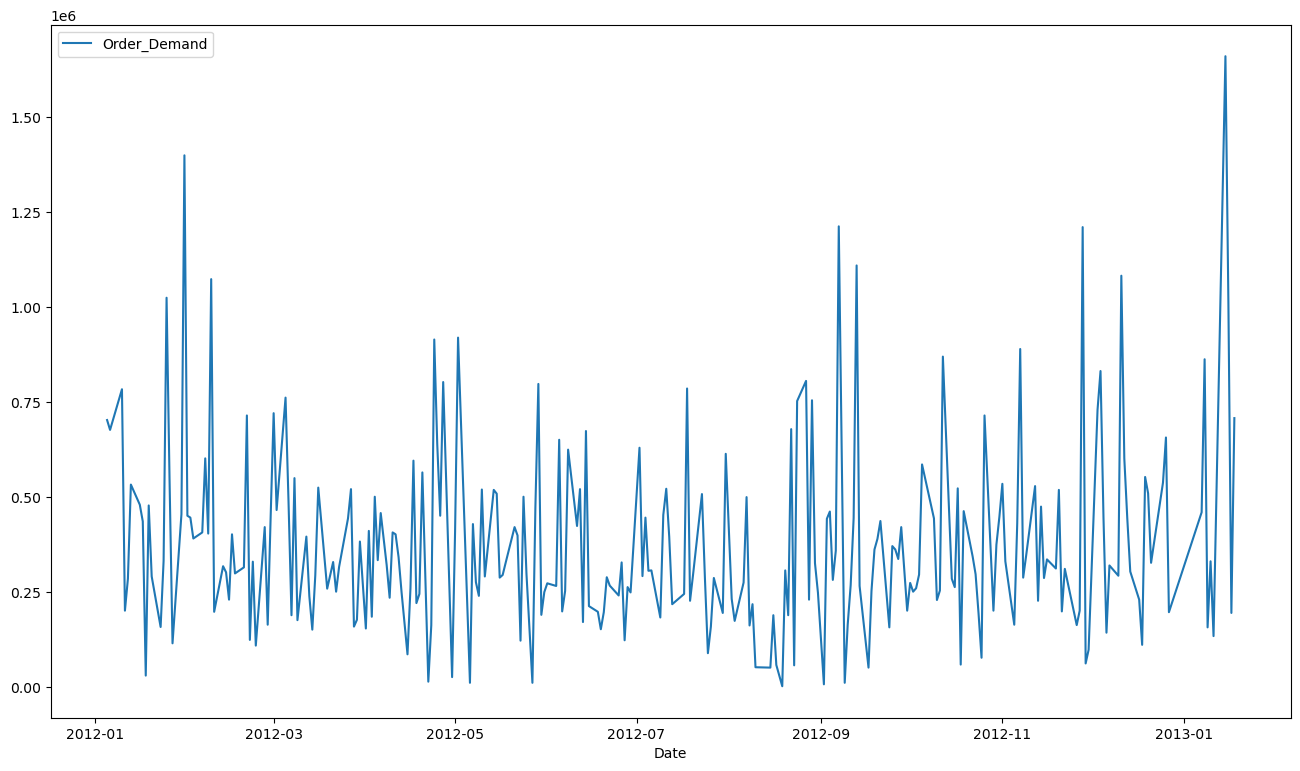

In [43]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df_store_Product_1359_detail.loc['2012-01-05':'2013-01-19',:])
plt.show()

<Axes: xlabel='Date'>

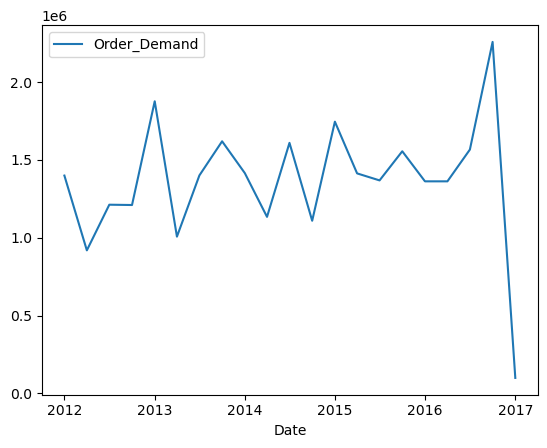

In [44]:
sns.lineplot(df_store_Product_1359_detail.resample(rule="QS").max())

In [45]:
df_store_Product_1359_detail.resample(rule="M").min()

,Order_Demand
Date,
2012-01-31,29000
2012-02-29,108000
2012-03-31,150000
2012-04-30,13000
2012-05-31,10000
...,...
2016-09-30,42000
2016-10-31,68000
2016-11-30,66000


In [46]:
df_store_Product_1359_detail.resample(rule="A").sum()

,Order_Demand
Date,
2012-12-31,95127000
2013-12-31,102692000
2014-12-31,95121000
2015-12-31,93082000
2016-12-31,86352000
2017-12-31,100000


In [47]:
# Now we are analysing start here

In [49]:
df_store_Product_1359_detail.resample(rule="A").max()

,Order_Demand
Date,
2012-12-31,1399000
2013-12-31,1876000
2014-12-31,1609000
2015-12-31,1745000
2016-12-31,2257000
2017-12-31,100000


In [51]:
df_store_Product_1359_detail.resample(rule="A").min()

,Order_Demand
Date,
2012-12-31,1000
2013-12-31,0
2014-12-31,2000
2015-12-31,0
2016-12-31,10000
2017-12-31,100000


In [146]:
# Every year product demand 

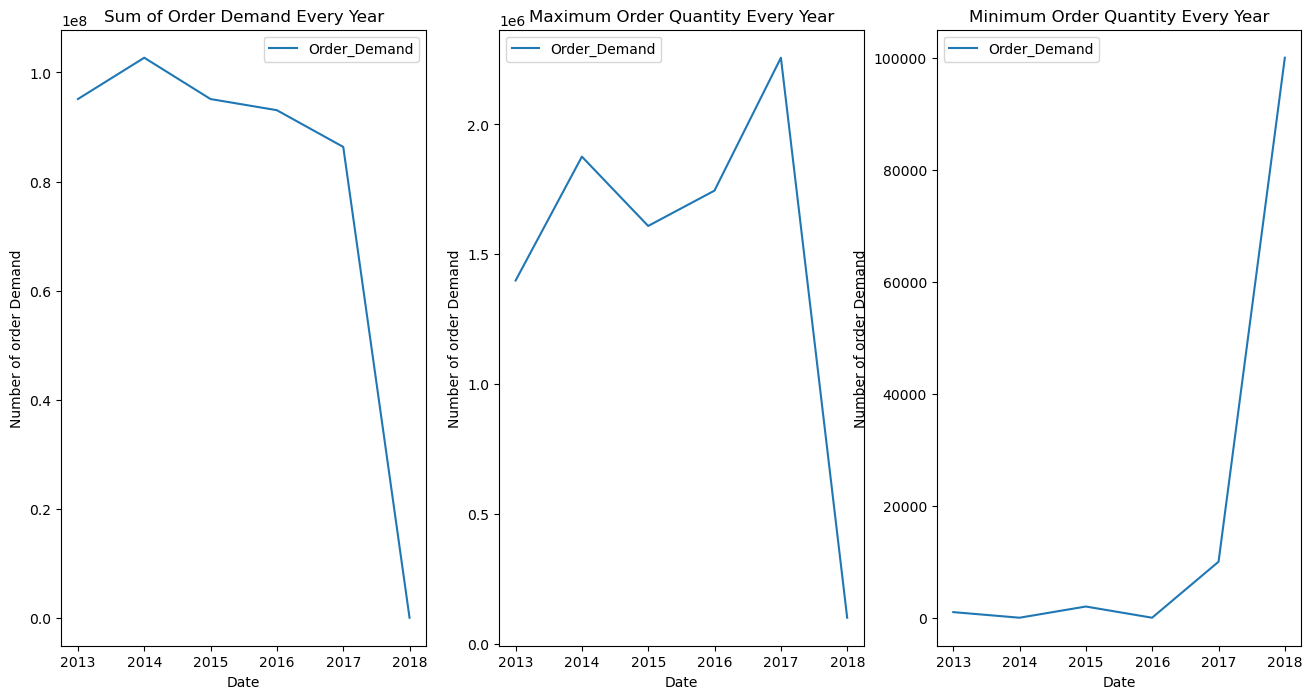

In [52]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.lineplot(df_store_Product_1359_detail.resample(rule="A").sum())
plt.ylabel("Number of order Demand")
plt.title("Sum of Order Demand Every Year")
plt.subplot(1,3,2)
sns.lineplot(df_store_Product_1359_detail.resample(rule="A").max())
plt.ylabel("Number of order Demand")
plt.title("Maximum Order Quantity Every Year")
plt.subplot(1,3,3)
sns.lineplot(df_store_Product_1359_detail.resample(rule="A").min())
plt.ylabel("Number of order Demand")
plt.title("Minimum Order Quantity Every Year")
plt.show()

In [53]:
df_store_Product_1359_detail.max()

Order_Demand    2257000
dtype: int32

In [54]:
#sns.barplot(y=df_store_product_1359_detail.resample(rule="A").max().values,x=df_store_product_1359_detail.resample(rule="A").max().index)
y=df_store_Product_1359_detail.resample(rule="A").max().values
x=df_store_Product_1359_detail.resample(rule="A").max().index

In [55]:
import numpy as np

In [56]:
x=np.reshape(x, (1,np.product(x.shape)))[0]
y=np.reshape(y, (1,np.product(y.shape)))[0]

In [57]:
x=np.reshape(x, (1,np.product(x.shape)))[0]
y=np.reshape(y, (1,np.product(y.shape)))[0]

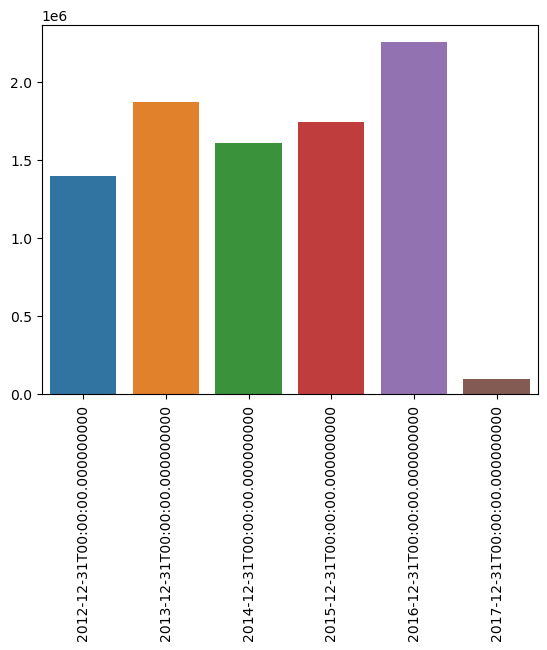

In [58]:
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Date'>

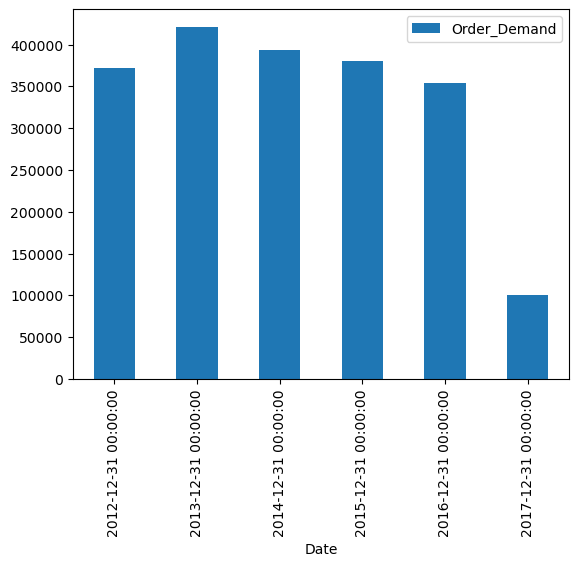

In [60]:
df_store_Product_1359_detail.resample(rule="A").mean().plot(kind='bar')

In [61]:
df_store_Product_1359_detail.loc["2017-01-01":"2017-12-31",:]

,Order_Demand
Date,
2017-01-06,100000


# Insight: We're noticing a consistent drop in product demand each year.
# Insight: we're noticing a big increment in maximum indiviual order in 2016 end 
# Insight: we're noticing a big increment in minimum indiviual order in end of 2016 because we not include 2017 because we have only one data in 2017.

In [62]:
df_store_Product_1359_detail.resample(rule="M").sum()

,Order_Demand
Date,
2012-01-31,8911000
2012-02-29,8131000
2012-03-31,7775000
2012-04-30,8960000
2012-05-31,8475000
...,...
2016-09-30,6960000
2016-10-31,7727000
2016-11-30,8814000


In [76]:
l1=df_store_Product_1359_detail.loc["2012-01-01":"2012-12-31",:]
l2=df_store_Product_1359_detail.loc["2013-01-01":"2013-12-31",:]
l3=df_store_Product_1359_detail.loc["2014-01-01":"2014-12-31",:]
l4=df_store_Product_1359_detail.loc["2015-01-01":"2015-12-31",:]
l5=df_store_Product_1359_detail.loc["2016-01-01":"2016-12-31",:]

In [77]:
l=[l1,l2,l3,l4,l5]

In [83]:
def Monthly_analysis_sum(l):
    plt.figure(figsize=(16,16))
    j=1
    for i in l:
        df=i
        plt.subplot(5,1,j)
        j+=1
        sns.lineplot(df.resample(rule="M").sum())
        #plt.xticks(df.resample(rule="M").sum().index.strftime('%B'), rotation=45)
    plt.show()

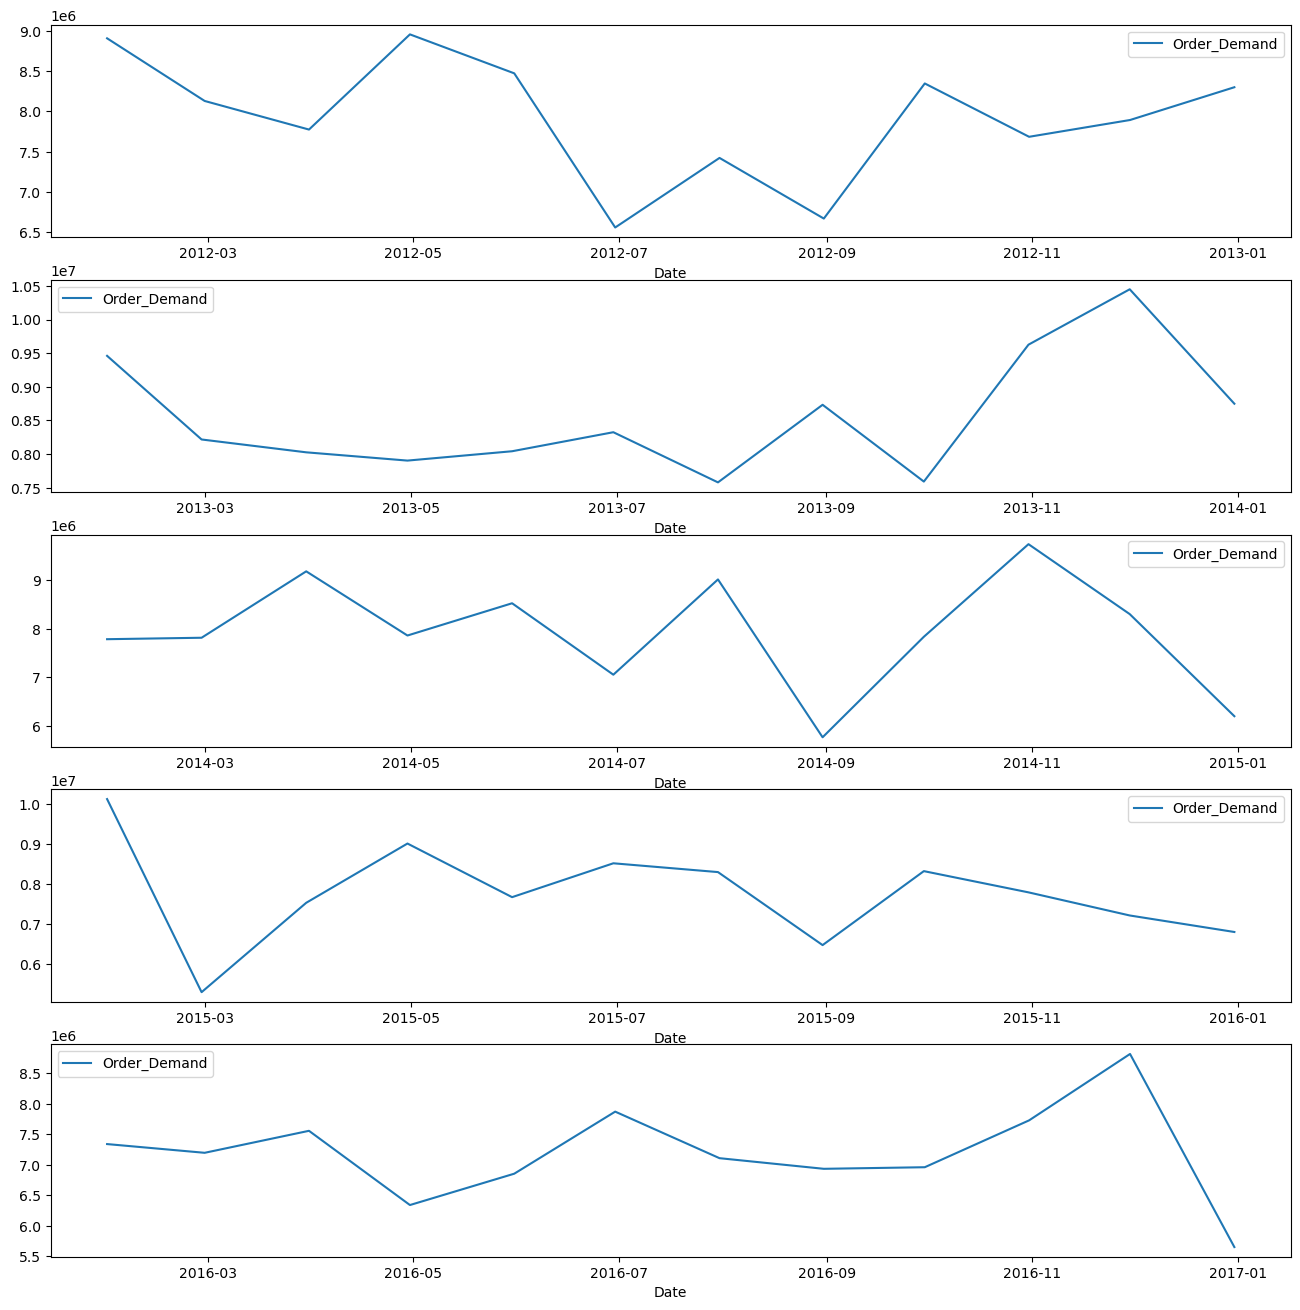

In [84]:
Monthly_analysis_sum(l)

In [85]:
def Monthly_analysis_max(l):
    plt.figure(figsize=(16,16))
    j=1
    for i in l:
        df=i
        plt.subplot(5,1,j)
        j+=1
        sns.lineplot(df.resample(rule="M").max())
    # plt.xticks(df.resample(rule="M").sum().index.strftime('%B'), rotation=45)
    plt.show()

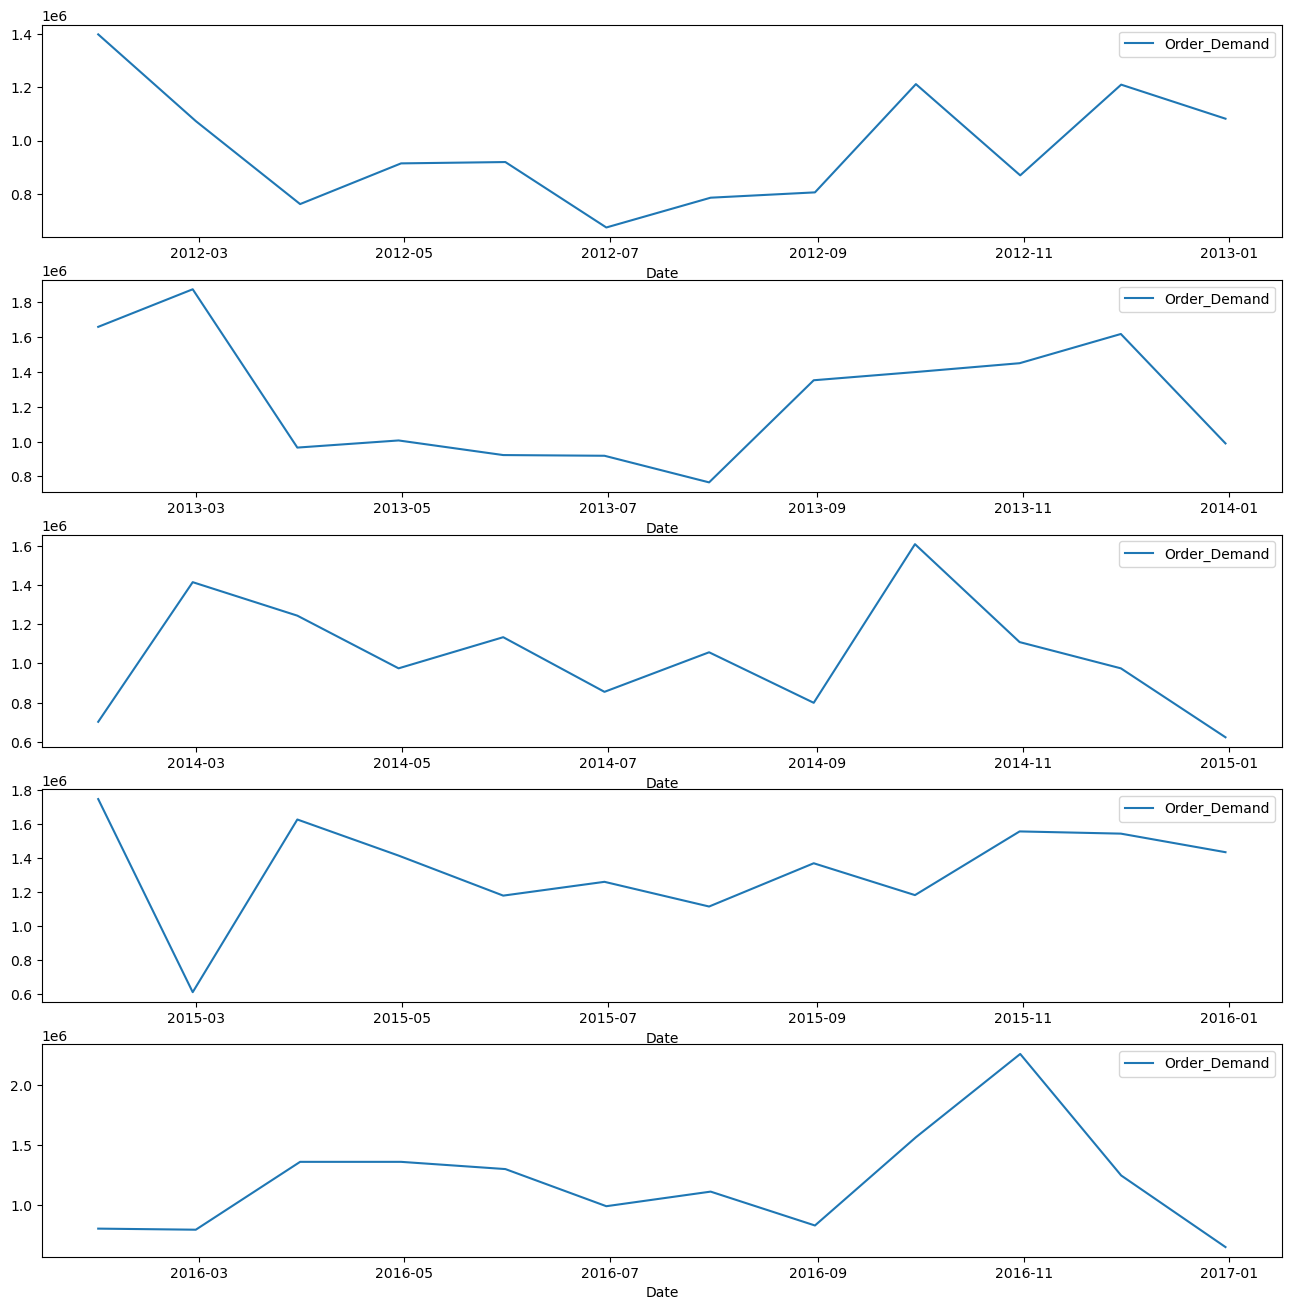

In [86]:
Monthly_analysis_max(l)

In [87]:
def Monthly_analysis_min(l):
    plt.figure(figsize=(16,16))
    j=1
    for i in l:
        df=i
        plt.subplot(5,1,j)
        j+=1
        sns.lineplot(df.resample(rule="M").min())
    # plt.xticks(df.resample(rule="M").sum().index.strftime('%B'), rotation=45)
    plt.show()

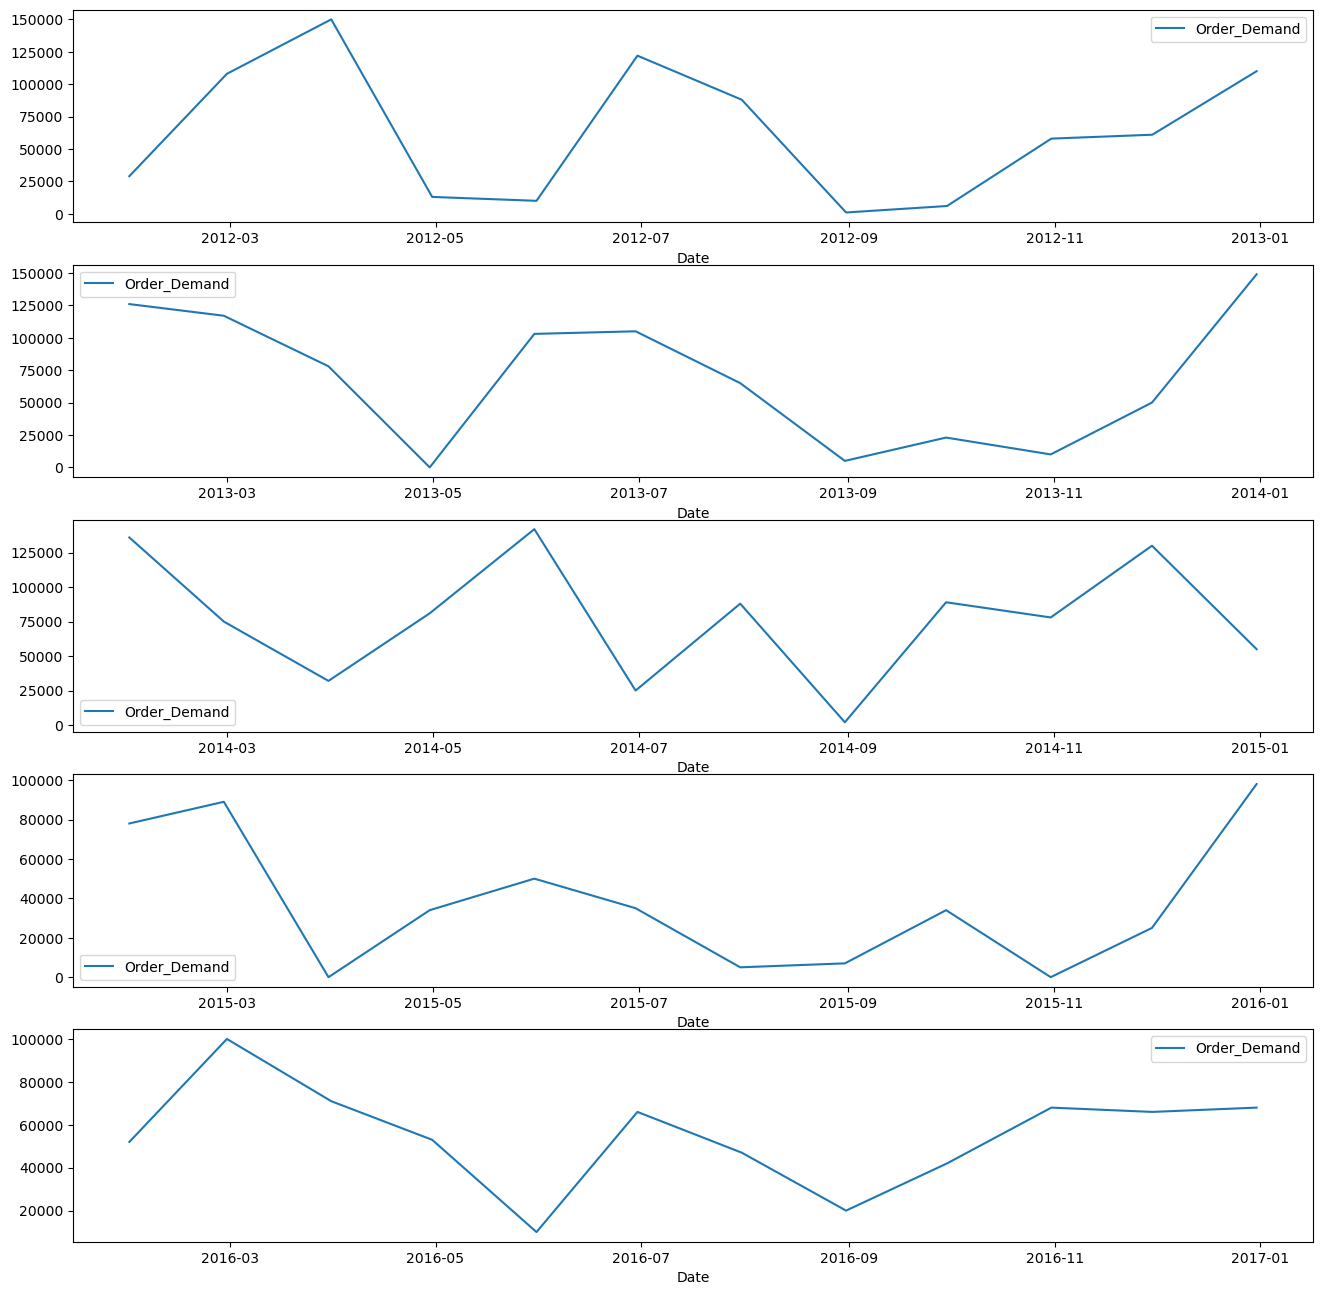

In [88]:
Monthly_analysis_min(l)

In [89]:
def Quaterly_analysis_sum(l):
    plt.figure(figsize=(16,16))
    j=1
    for i in l:
        df=i
        plt.subplot(5,1,j)
        j+=1
        sns.lineplot(df.resample(rule="Q").sum())
    # plt.xticks(df.resample(rule="M").sum().index.strftime('%B'), rotation=45)
    plt.show()

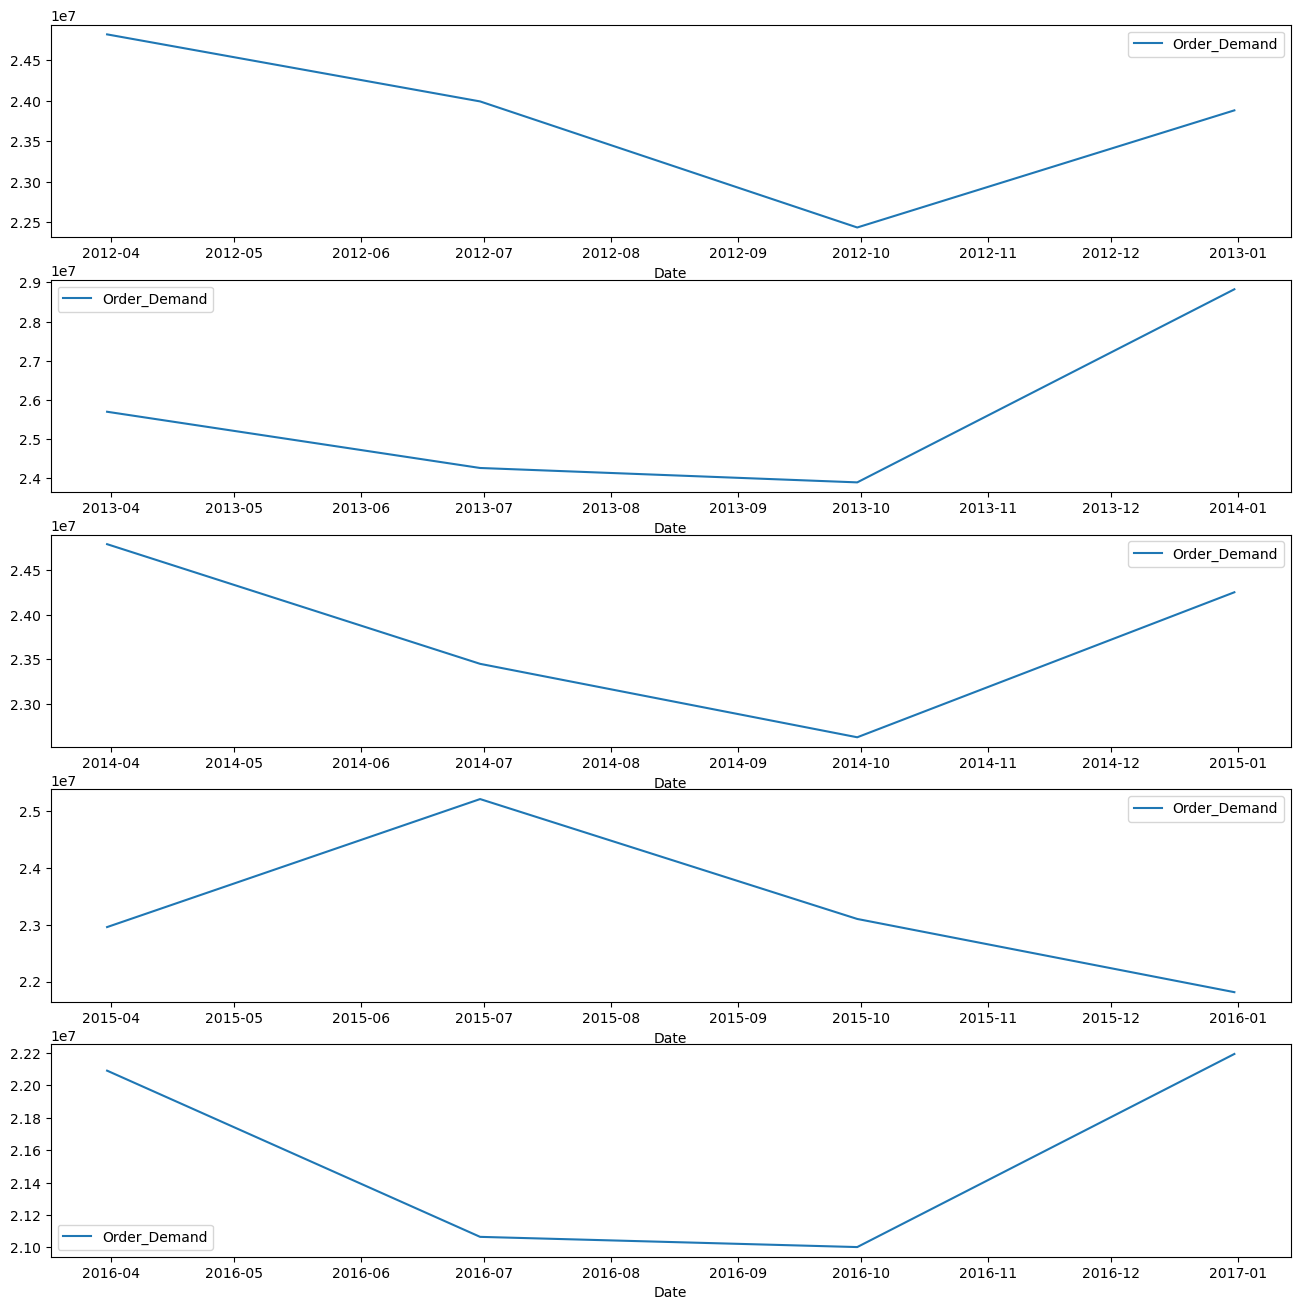

In [90]:
Quaterly_analysis_sum(l)

In [91]:
l[0].resample(rule="Q").sum()

,Order_Demand
Date,
2012-03-31,24817000
2012-06-30,23991000
2012-09-30,22438000
2012-12-31,23881000


In [92]:
l[1].resample(rule="Q").sum()

,Order_Demand
Date,
2013-03-31,25701000
2013-06-30,24267000
2013-09-30,23900000
2013-12-31,28824000


In [93]:
l[3].resample(rule="Q").sum()

,Order_Demand
Date,
2015-03-31,22958000
2015-06-30,25210000
2015-09-30,23101000
2015-12-31,21813000


In [94]:
l[4].resample(rule="Q").sum()

,Order_Demand
Date,
2016-03-31,22091000
2016-06-30,21065000
2016-09-30,21002000
2016-12-31,22194000


# Insight: We observe a consistent decrease in order quantity, particularly noticeable during the third quarter, suggesting a continual decline over successive quarters every year.

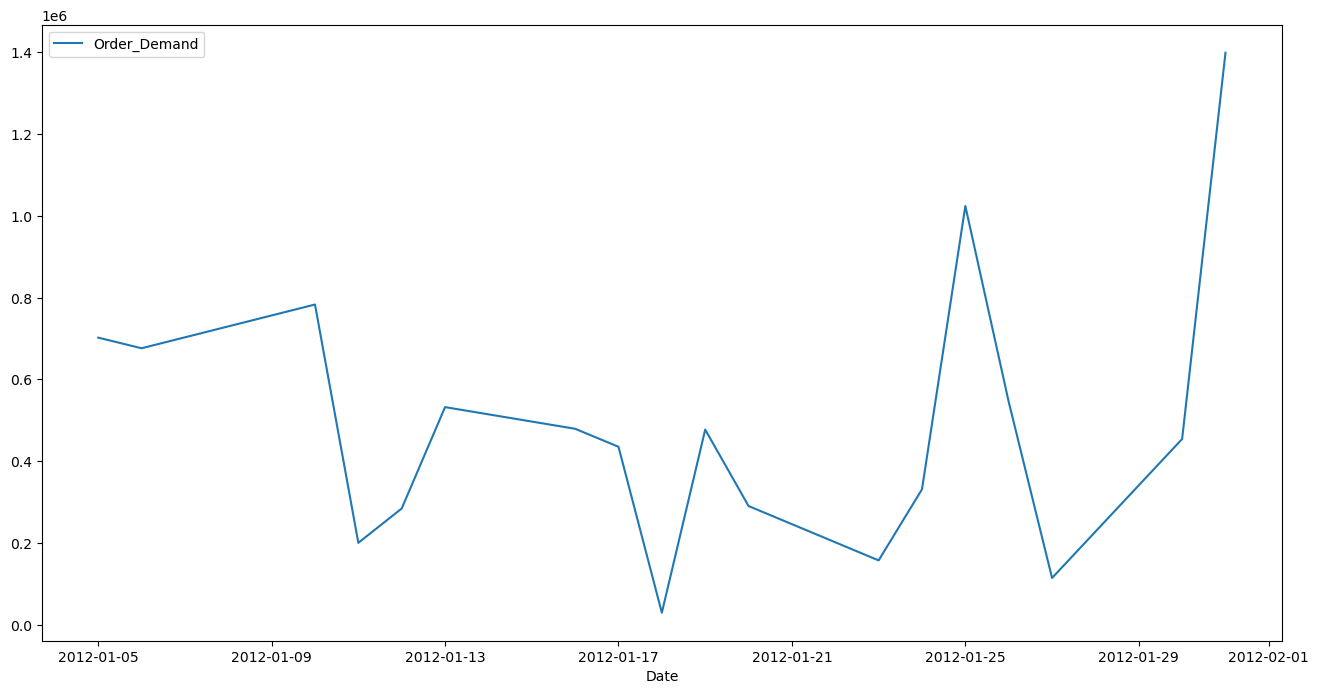

In [95]:
plt.figure(figsize=(16,8))
sns.lineplot(df_store_Product_1359_detail.loc["2012-01-01":"2012-01-31",:])
plt.show()

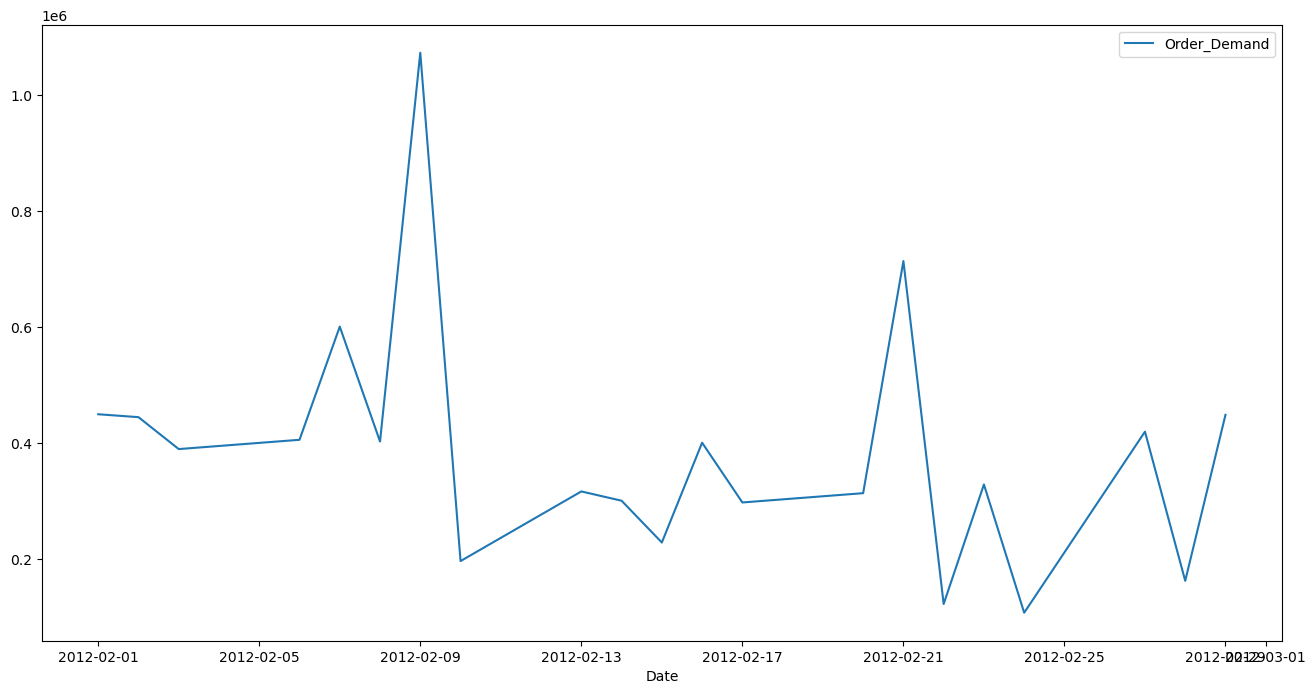

In [96]:
plt.figure(figsize=(16,8))
sns.lineplot(df_store_Product_1359_detail.loc["2012-02-01":"2012-02-29",:])
plt.show()

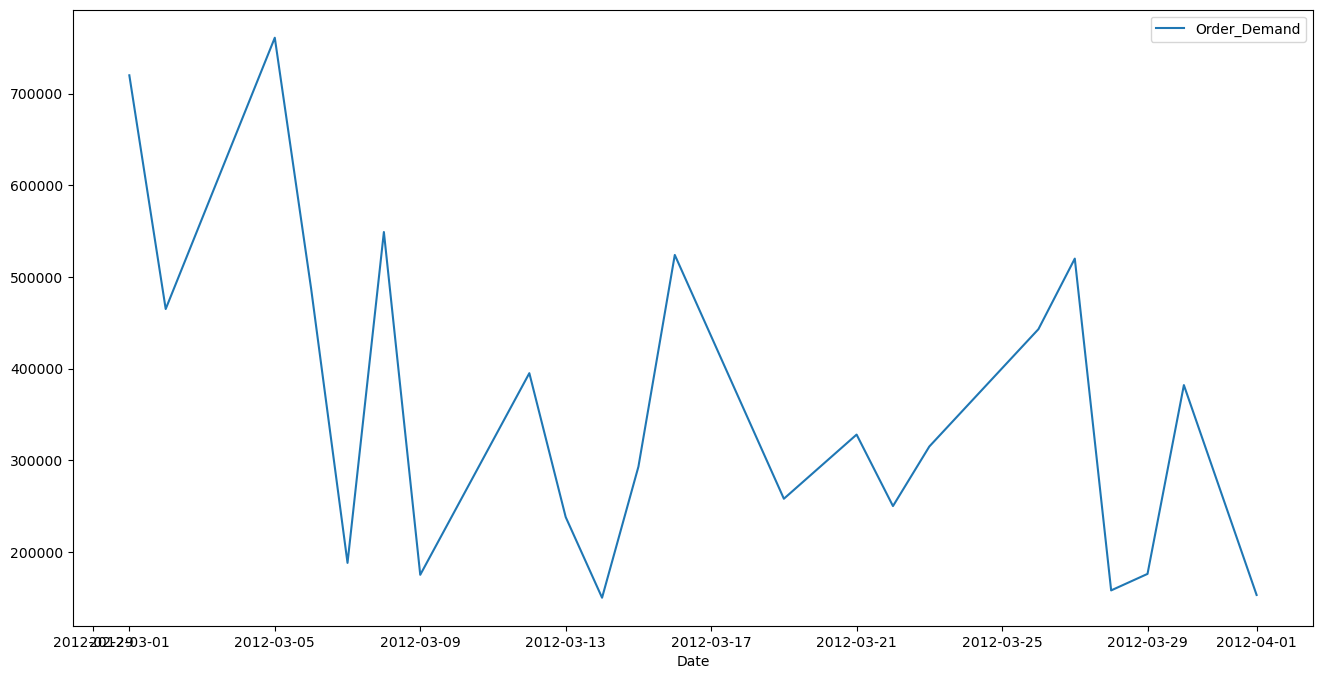

In [97]:
plt.figure(figsize=(16,8))
sns.lineplot(df_store_Product_1359_detail.loc["2012-03-01":"2012-04-01",:])
plt.show()

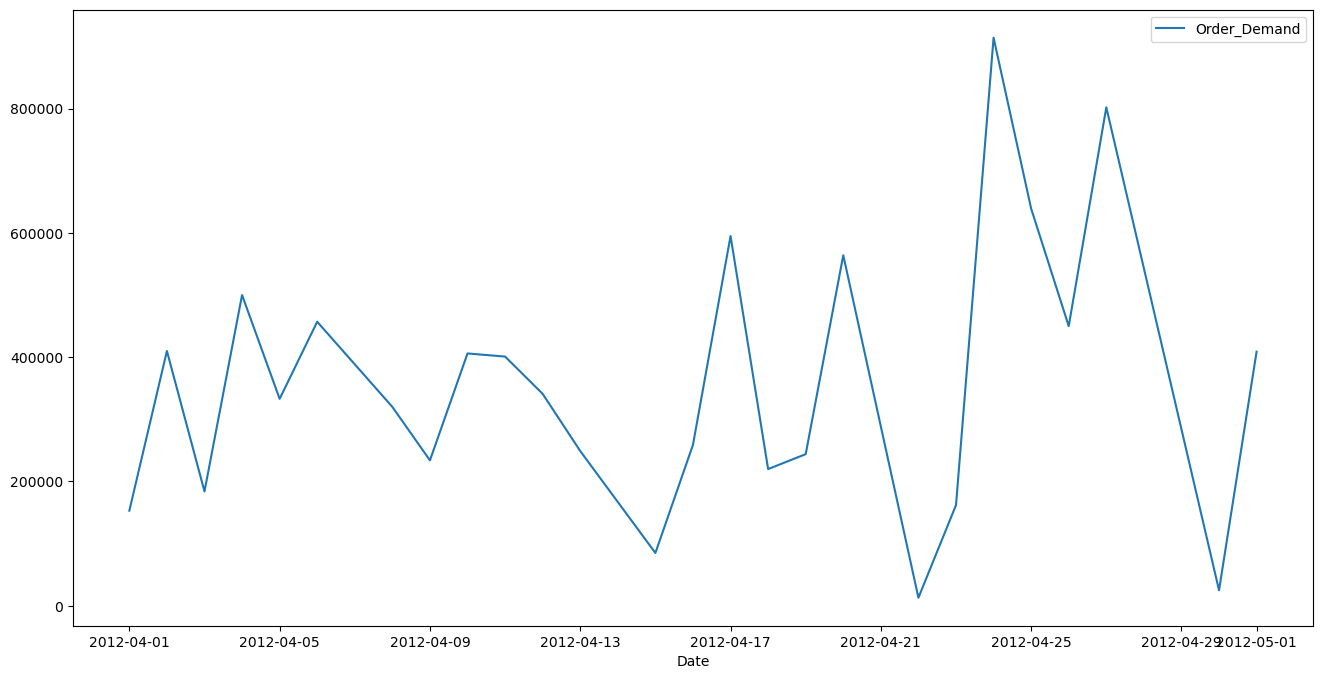

In [98]:
plt.figure(figsize=(16,8))
sns.lineplot(df_store_Product_1359_detail.loc["2012-04-01":"2012-05-01",:])
plt.show()

In [99]:
# Mothly analysis

In [100]:
df_store_Product_1359_detail.index

DatetimeIndex(['2012-01-05', '2012-01-06', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13', '2012-01-16', '2012-01-17',
               '2012-01-18', '2012-01-19',
               ...
               '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20',
               '2016-12-21', '2016-12-22', '2016-12-26', '2016-12-27',
               '2016-12-28', '2017-01-06'],
              dtype='datetime64[ns]', name='Date', length=1232, freq=None)

In [103]:
l_01_2012=df_store_Product_1359_detail.loc["2012-01-01":"2012-02-01",:]
l_02_2012=df_store_Product_1359_detail.loc["2012-02-01":"2012-03-01",:]
l_03_2012=df_store_Product_1359_detail.loc["2012-03-01":"2012-04-01",:]
l_04_2012=df_store_Product_1359_detail.loc["2012-04-01":"2012-05-01",:]
l_05_2012=df_store_Product_1359_detail.loc["2012-05-01":"2012-06-01",:]
l_06_2012=df_store_Product_1359_detail.loc["2012-06-01":"2012-07-01",:]
l_07_2012=df_store_Product_1359_detail.loc["2012-07-01":"2012-08-01",:]
l_08_2012=df_store_Product_1359_detail.loc["2012-08-01":"2012-09-01",:]
l_09_2012=df_store_Product_1359_detail.loc["2012-09-01":"2012-10-01",:]
l_10_2012=df_store_Product_1359_detail.loc["2012-10-01":"2012-11-01",:]
l_11_2012=df_store_Product_1359_detail.loc["2012-11-01":"2012-12-01",:]
l_12_2012=df_store_Product_1359_detail.loc["2012-12-01":"2013-01-01",:]

In [104]:
l_01_2013=df_store_Product_1359_detail.loc["2013-01-01":"2013-02-01",:]
l_02_2013=df_store_Product_1359_detail.loc["2013-02-01":"2013-03-01",:]
l_03_2013=df_store_Product_1359_detail.loc["2013-03-01":"2013-04-01",:]
l_04_2013=df_store_Product_1359_detail.loc["2013-04-01":"2013-05-01",:]
l_05_2013=df_store_Product_1359_detail.loc["2013-05-01":"2013-06-01",:]
l_06_2013=df_store_Product_1359_detail.loc["2013-06-01":"2013-07-01",:]
l_07_2013=df_store_Product_1359_detail.loc["2013-07-01":"2013-08-01",:]
l_08_2013=df_store_Product_1359_detail.loc["2013-08-01":"2013-09-01",:]
l_09_2013=df_store_Product_1359_detail.loc["2013-09-01":"2013-10-01",:]
l_10_2013=df_store_Product_1359_detail.loc["2013-10-01":"2013-11-01",:]
l_11_2013=df_store_Product_1359_detail.loc["2013-11-01":"2013-12-01",:]
l_12_2013=df_store_Product_1359_detail.loc["2013-12-01":"2014-01-01",:]

In [108]:
l_01_2014=df_store_Product_1359_detail.loc["2014-01-01":"2014-02-01",:]
l_02_2014=df_store_Product_1359_detail.loc["2014-02-01":"2014-03-01",:]
l_03_2014=df_store_Product_1359_detail.loc["2014-03-01":"2014-04-01",:]
l_04_2014=df_store_Product_1359_detail.loc["2014-04-01":"2014-05-01",:]
l_05_2014=df_store_Product_1359_detail.loc["2014-05-01":"2014-06-01",:]
l_06_2014=df_store_Product_1359_detail.loc["2014-06-01":"2014-07-01",:]
l_07_2014=df_store_Product_1359_detail.loc["2014-07-01":"2014-08-01",:]
l_08_2014=df_store_Product_1359_detail.loc["2014-08-01":"2014-09-01",:]
l_09_2014=df_store_Product_1359_detail.loc["2014-09-01":"2014-10-01",:]
l_10_2014=df_store_Product_1359_detail.loc["2014-10-01":"2014-11-01",:]
l_11_2014=df_store_Product_1359_detail.loc["2014-11-01":"2014-12-01",:]
l_12_2014=df_store_Product_1359_detail.loc["2014-12-01":"2015-01-01",:]

In [106]:
l_01_2015=df_store_Product_1359_detail.loc["2015-01-01":"2015-02-01",:]
l_02_2015=df_store_Product_1359_detail.loc["2015-02-01":"2015-03-01",:]
l_03_2015=df_store_Product_1359_detail.loc["2015-03-01":"2015-04-01",:]
l_04_2015=df_store_Product_1359_detail.loc["2015-04-01":"2015-05-01",:]
l_05_2015=df_store_Product_1359_detail.loc["2015-05-01":"2015-06-01",:]
l_06_2015=df_store_Product_1359_detail.loc["2015-06-01":"2015-07-01",:]
l_07_2015=df_store_Product_1359_detail.loc["2015-07-01":"2015-08-01",:]
l_08_2015=df_store_Product_1359_detail.loc["2015-08-01":"2015-09-01",:]
l_09_2015=df_store_Product_1359_detail.loc["2015-09-01":"2015-10-01",:]
l_10_2015=df_store_Product_1359_detail.loc["2015-10-01":"2015-11-01",:]
l_11_2015=df_store_Product_1359_detail.loc["2015-11-01":"2015-12-01",:]
l_12_2015=df_store_Product_1359_detail.loc["2015-12-01":"2016-01-01",:]

In [107]:
l_01_2016=df_store_Product_1359_detail.loc["2016-01-01":"2016-02-01",:]
l_02_2016=df_store_Product_1359_detail.loc["2016-02-01":"2016-03-01",:]
l_03_2016=df_store_Product_1359_detail.loc["2016-03-01":"2016-04-01",:]
l_04_2016=df_store_Product_1359_detail.loc["2016-04-01":"2016-05-01",:]
l_05_2016=df_store_Product_1359_detail.loc["2016-05-01":"2016-06-01",:]
l_06_2016=df_store_Product_1359_detail.loc["2016-06-01":"2016-07-01",:]
l_07_2016=df_store_Product_1359_detail.loc["2016-07-01":"2016-08-01",:]
l_08_2016=df_store_Product_1359_detail.loc["2016-08-01":"2016-09-01",:]
l_09_2016=df_store_Product_1359_detail.loc["2016-09-01":"2016-10-01",:]
l_10_2016=df_store_Product_1359_detail.loc["2016-10-01":"2016-11-01",:]
l_11_2016=df_store_Product_1359_detail.loc["2016-11-01":"2016-12-01",:]
l_12_2016=df_store_Product_1359_detail.loc["2016-12-01":"2017-01-01",:]

In [109]:
l_2012=[l_01_2012,l_02_2012,l_03_2012,l_04_2012,l_05_2012,l_06_2012,l_07_2012,l_08_2012,l_09_2012,l_10_2012,l_11_2012,l_12_2012]
l_2013=[l_01_2013,l_02_2013,l_03_2013,l_04_2013,l_05_2013,l_06_2013,l_07_2013,l_08_2013,l_09_2013,l_10_2013,l_11_2013,l_12_2013]
l_2014=[l_01_2014,l_02_2014,l_03_2014,l_04_2014,l_05_2014,l_06_2014,l_07_2014,l_08_2014,l_09_2014,l_10_2014,l_11_2014,l_12_2014]
l_2015=[l_01_2015,l_02_2015,l_03_2015,l_04_2015,l_05_2015,l_06_2015,l_07_2015,l_08_2015,l_09_2015,l_10_2015,l_11_2015,l_12_2015]
l_2016=[l_01_2016,l_02_2016,l_03_2016,l_04_2016,l_05_2016,l_06_2016,l_07_2016,l_08_2016,l_09_2016,l_10_2016,l_11_2016,l_12_2016]

In [110]:
def Every_month_analysis(month_list):
    n=len(l_2012)
    mnth=["January","February","March","April","May","June","July","August","September","October","November","December"]
    plt.figure(figsize=(16,20))
    j=1 
    for i in month_list:
        plt.subplot(6,2,j)
        plt.title(mnth[j-1])
        j+=1
        sns.lineplot(i)
        plt.xticks(rotation=45)
    plt.show()

In [111]:
len(l_2012)

12

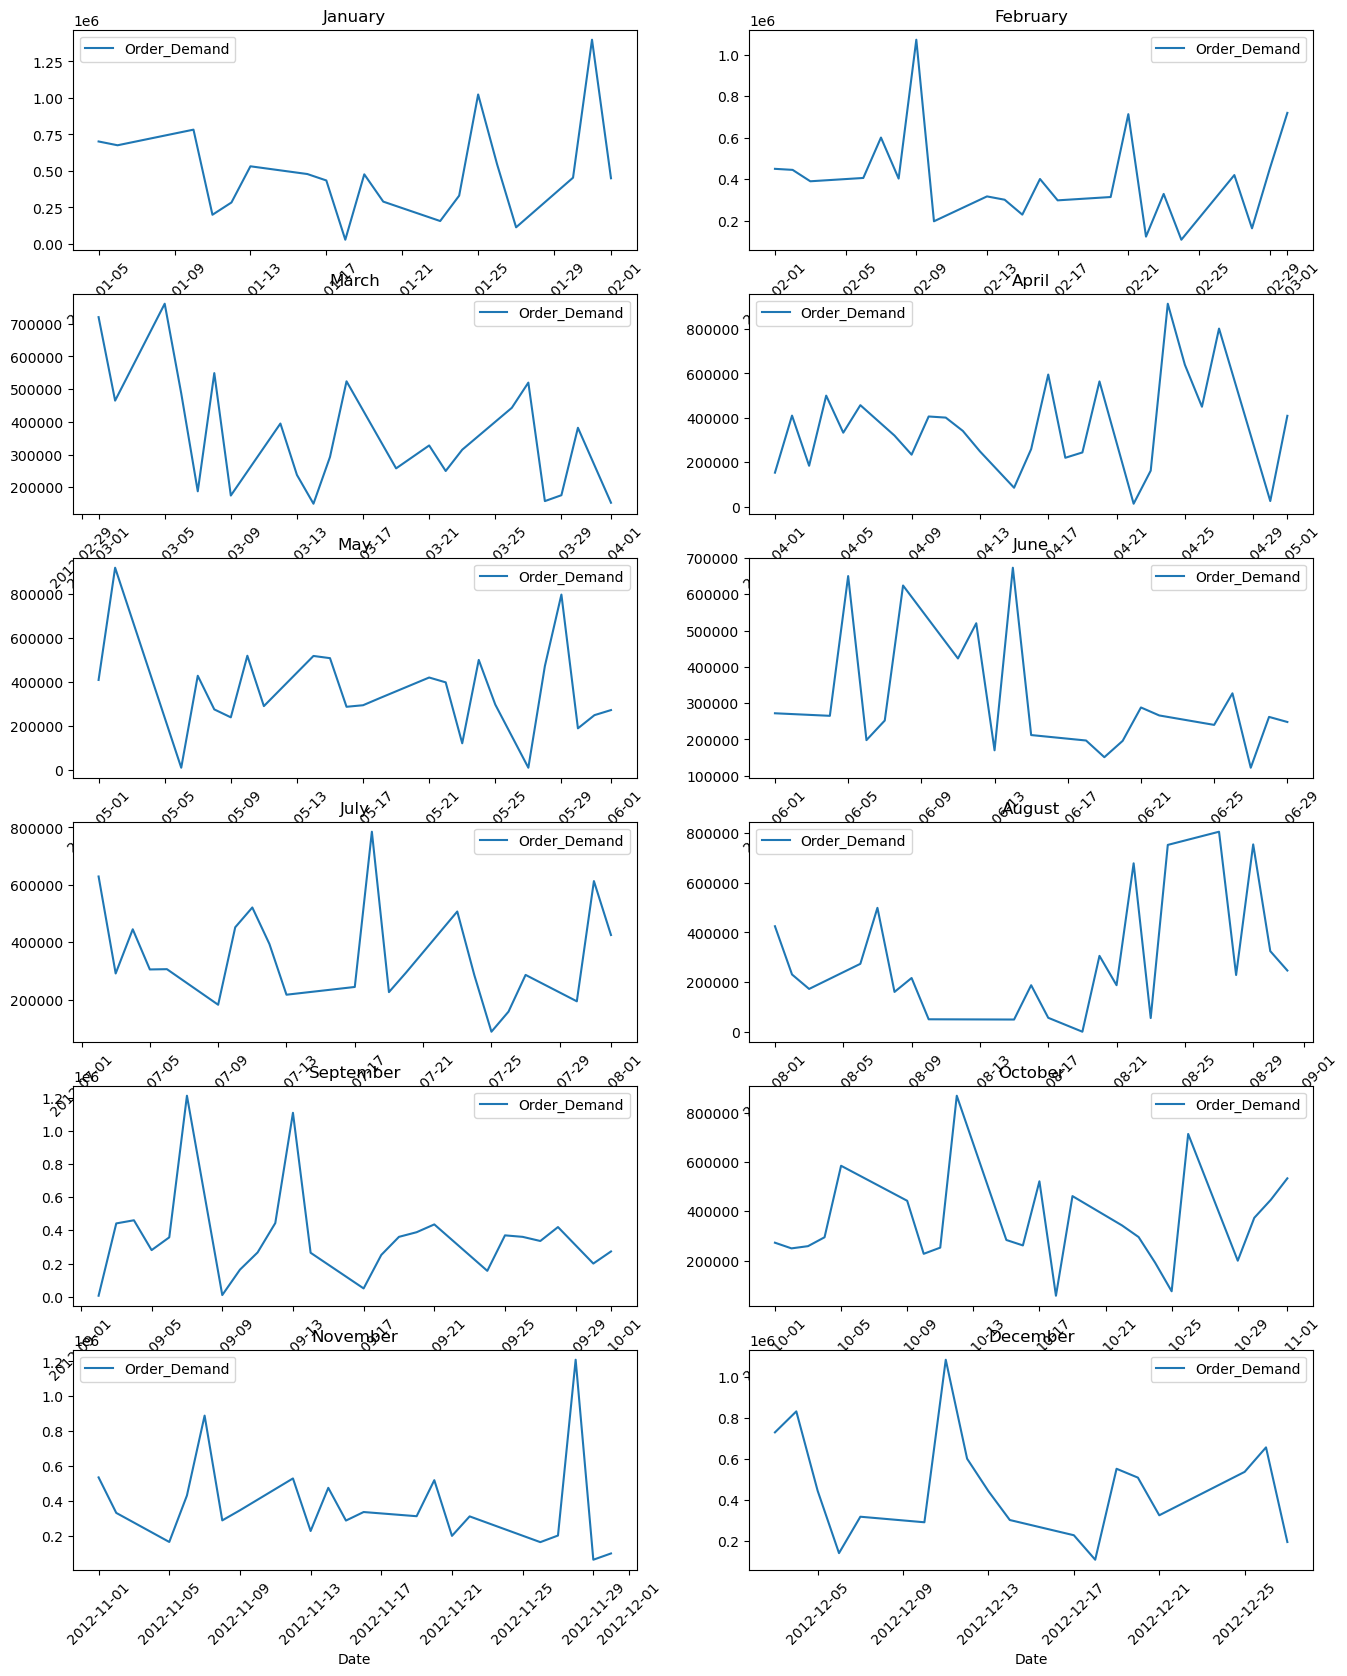

In [112]:
Every_month_analysis(l_2012)

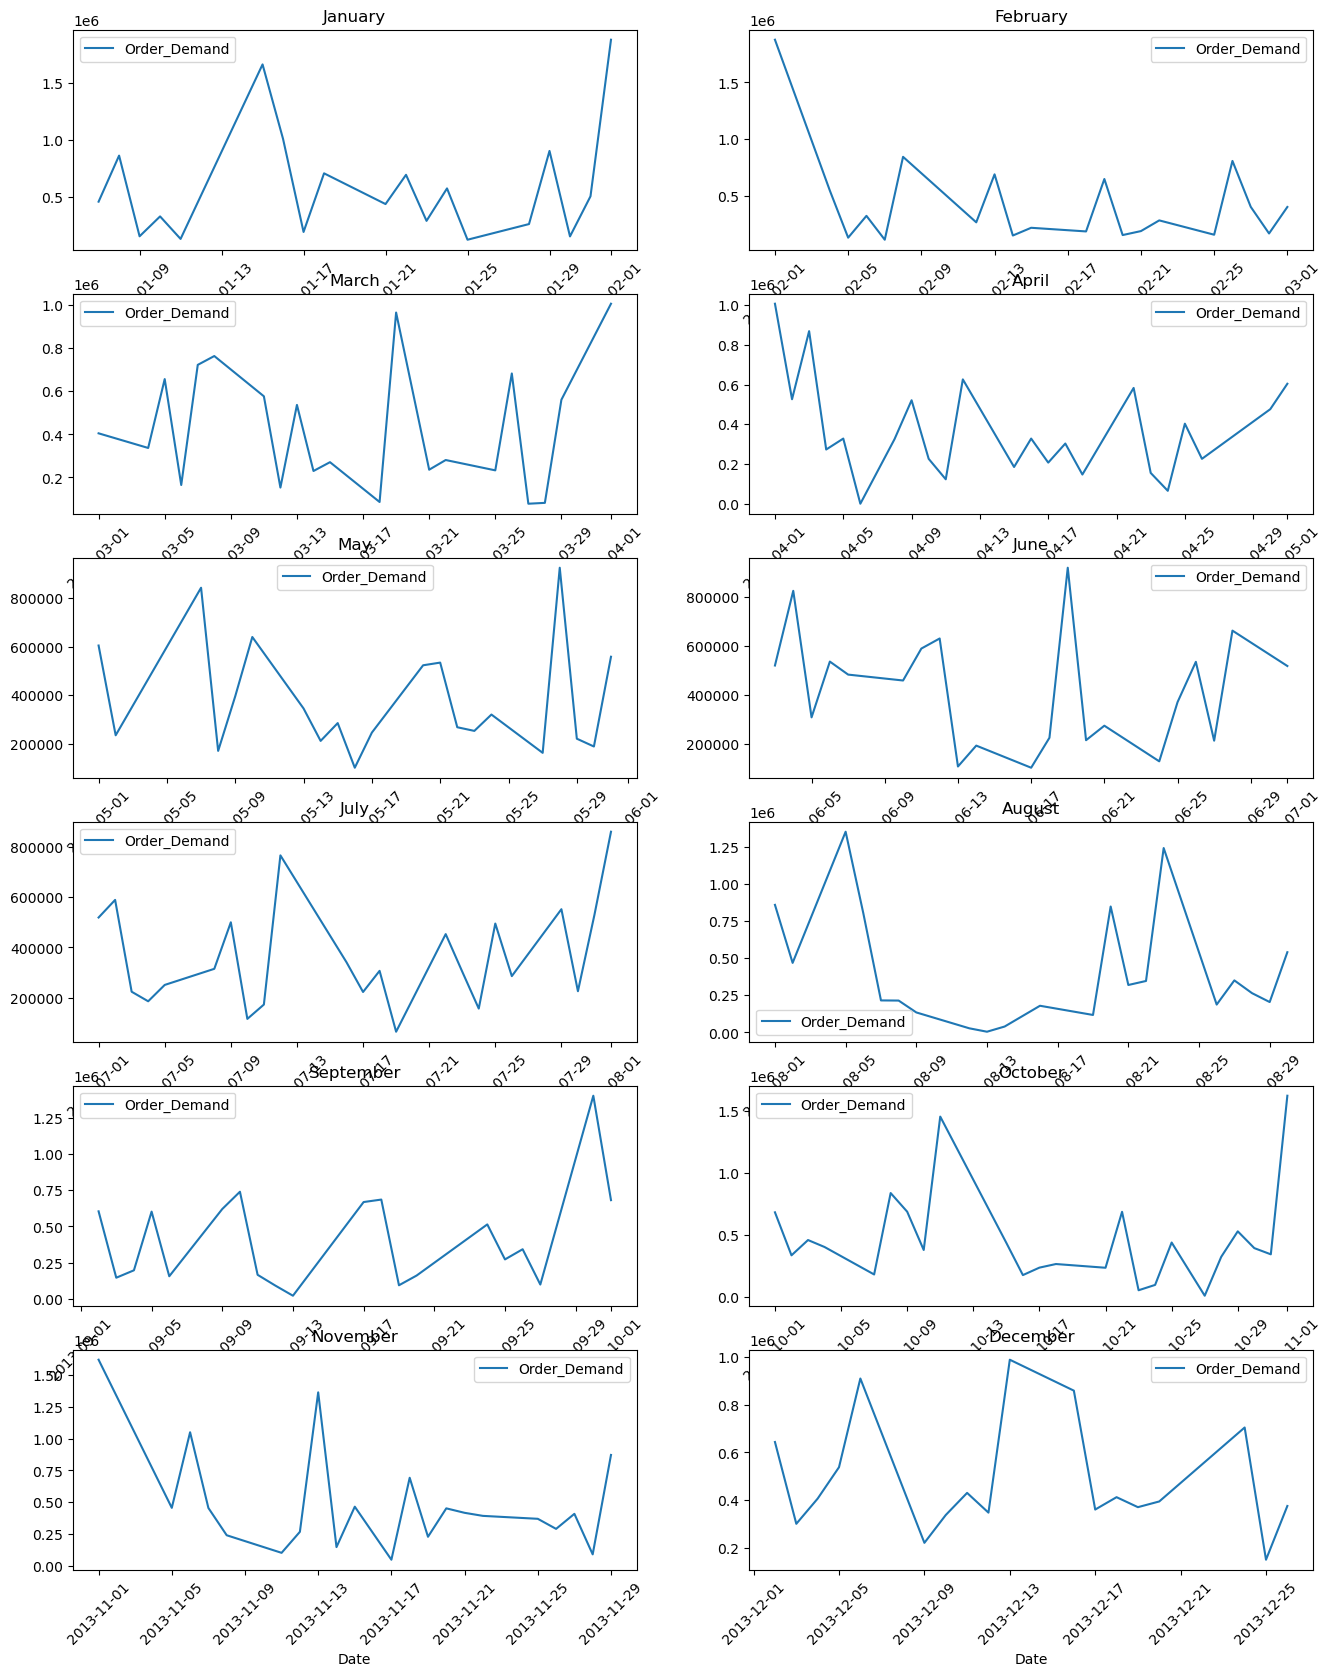

In [113]:
Every_month_analysis(l_2013)

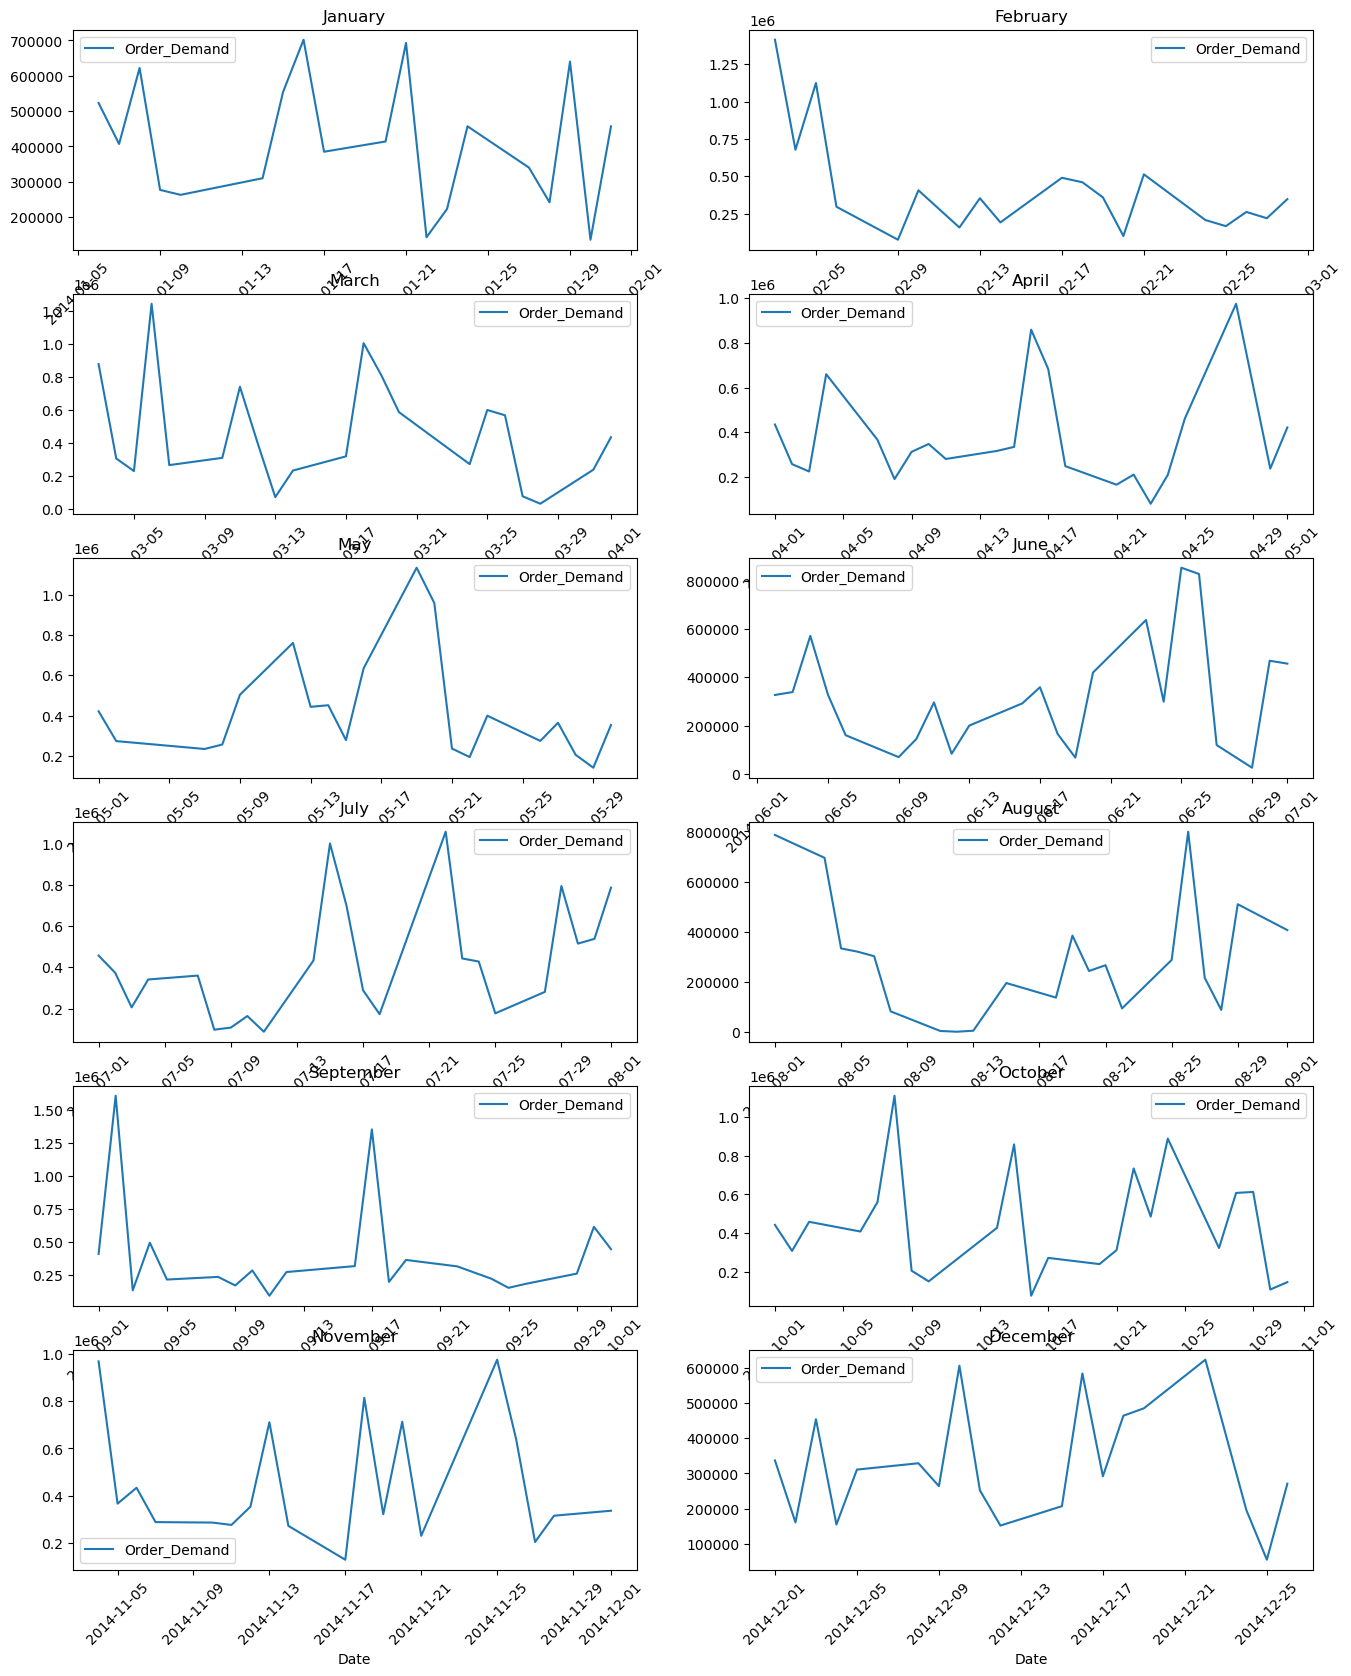

In [114]:
Every_month_analysis(l_2014)

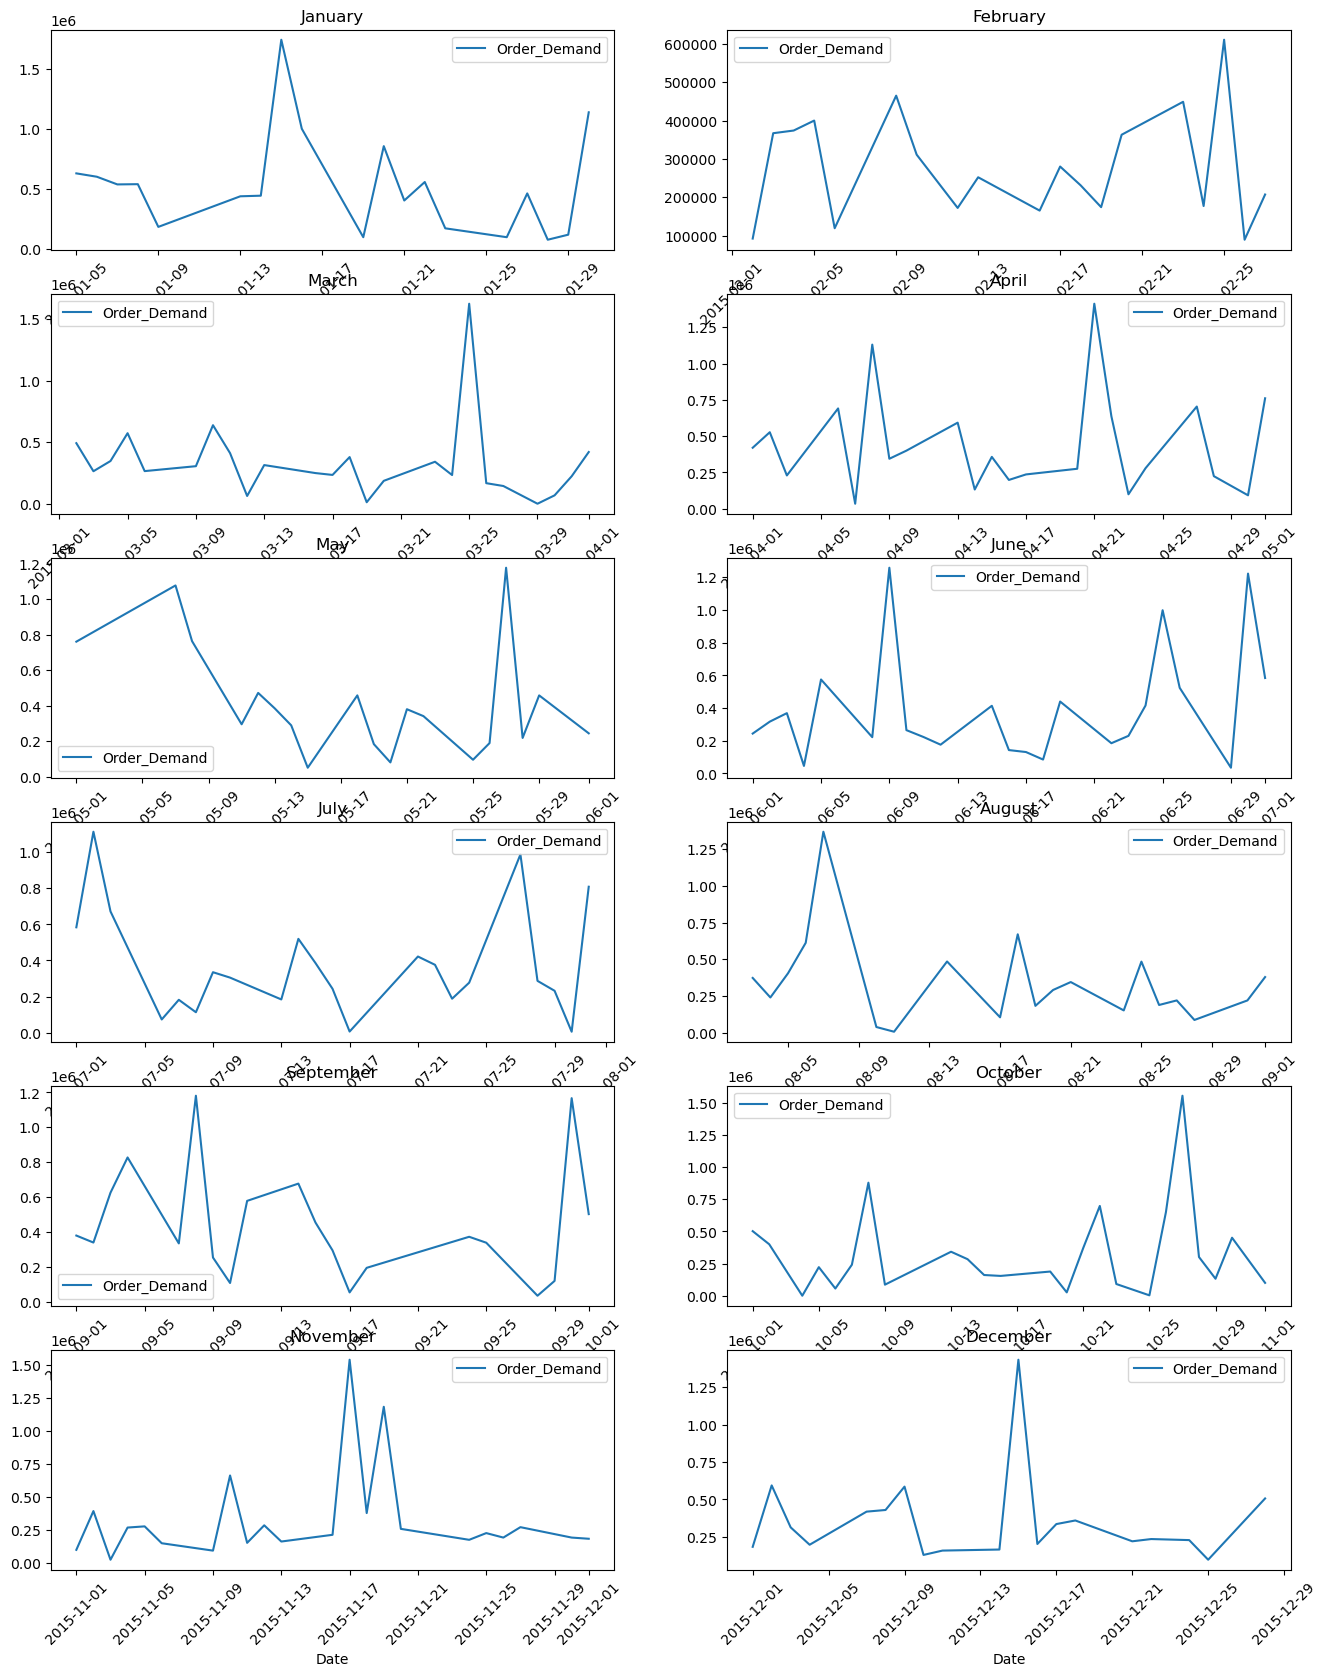

In [115]:
Every_month_analysis(l_2015)

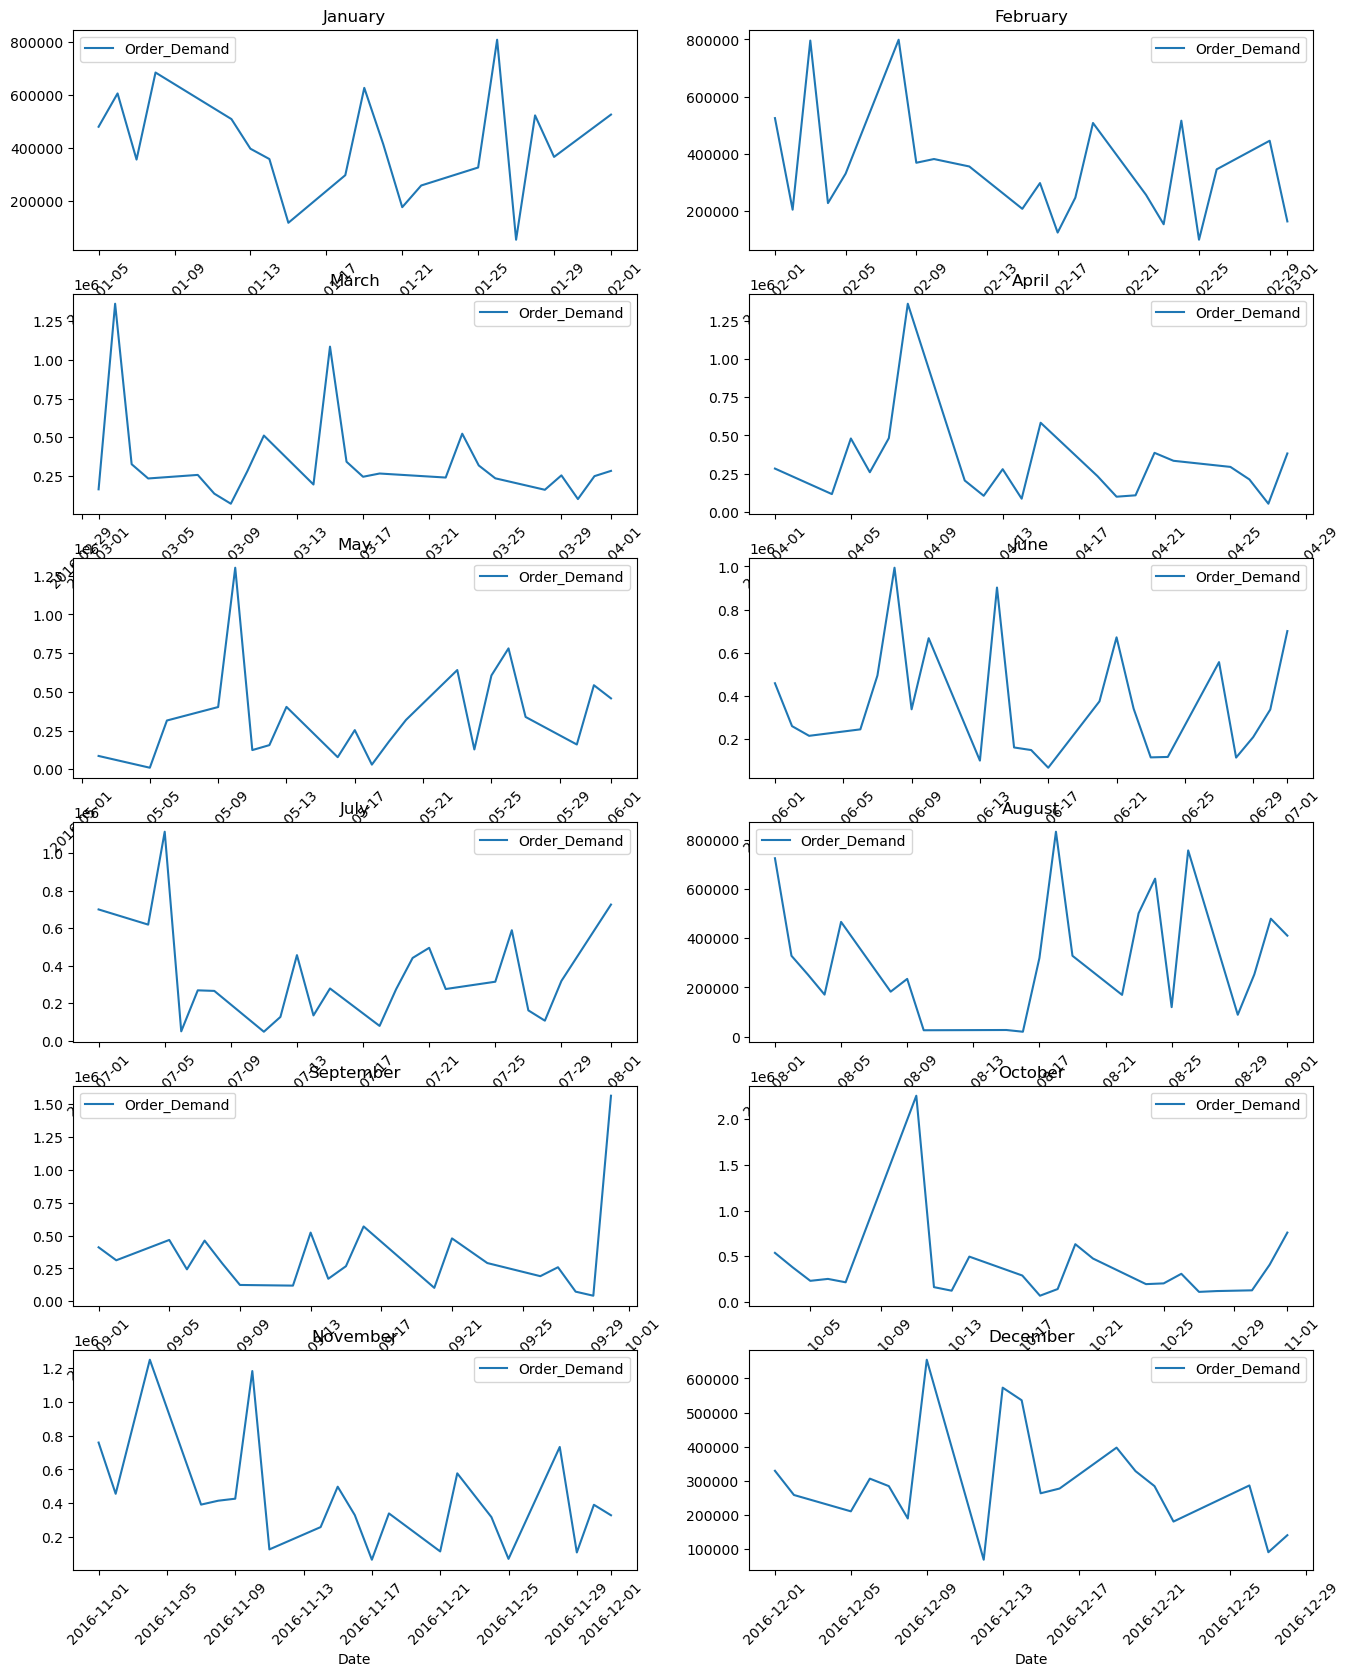

In [116]:
Every_month_analysis(l_2016)

In [117]:
df_store_Product_1359_detail.shape

(1232, 1)

# Go to <font color ="red"> store_stock_quantity_prediction (1).ipynb  </font> for predictive model.